# DSCI 100 Group Project Proposal

## Introduction

Heart disease is a concern for many as they age, as it can lead to health complications and even death. There are often extrinsic factors that can affect the development of these heart diseases. 

Our goal from this research is to determine the extent that these factors can have on heart health. The research question we are attempting to answer is “How do different medical ailments affect the development of heart diseases”  The Heart Disease Data Set, provides data such as smoking history as well as exercise history and data on different heart diseases that we will use to find an answer to our research question.



## Preliminary exploratory data analysis

In [6]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


### Step 1: Load the data into R and wrangle the data into tidy format

In [7]:
heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) %>%
                        mutate(restecg = as_factor(restecg)) %>%
                        mutate(num = as_factor(num))
heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


(More data processing might be needed later)

### Step 2: Split the data into training and testing data

In [8]:
heart_split <- initial_split(heart_disease, prop = .8, strata = restecg, num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)
heart_training
heart_testing

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
61,1,4,148,203,0,0,161,0,0,1,1.0,7.0,2
41,1,2,120,157,0,0,182,0,0,1,0.0,3.0,0
38,1,3,138,175,0,0,173,0,0,1,?,3.0,0


### Step 3: Summarize data

As an example, we will group the data points using the restecg (resting electrocardiographic results) column and count the number of rows corresponding to each of the results.

In [13]:
heart_training_sum <- heart_training %>%
    group_by(restecg) %>%
    summarize(n = n())
heart_training_sum

`summarise()` ungrouping output (override with `.groups` argument)



restecg,n
<fct>,<int>
0,121
1,4
2,119


### Step 4: Visualizing Data

In this section, we will plot serum cholestoral (chol) against age, and color the data points using values of the restecg column.

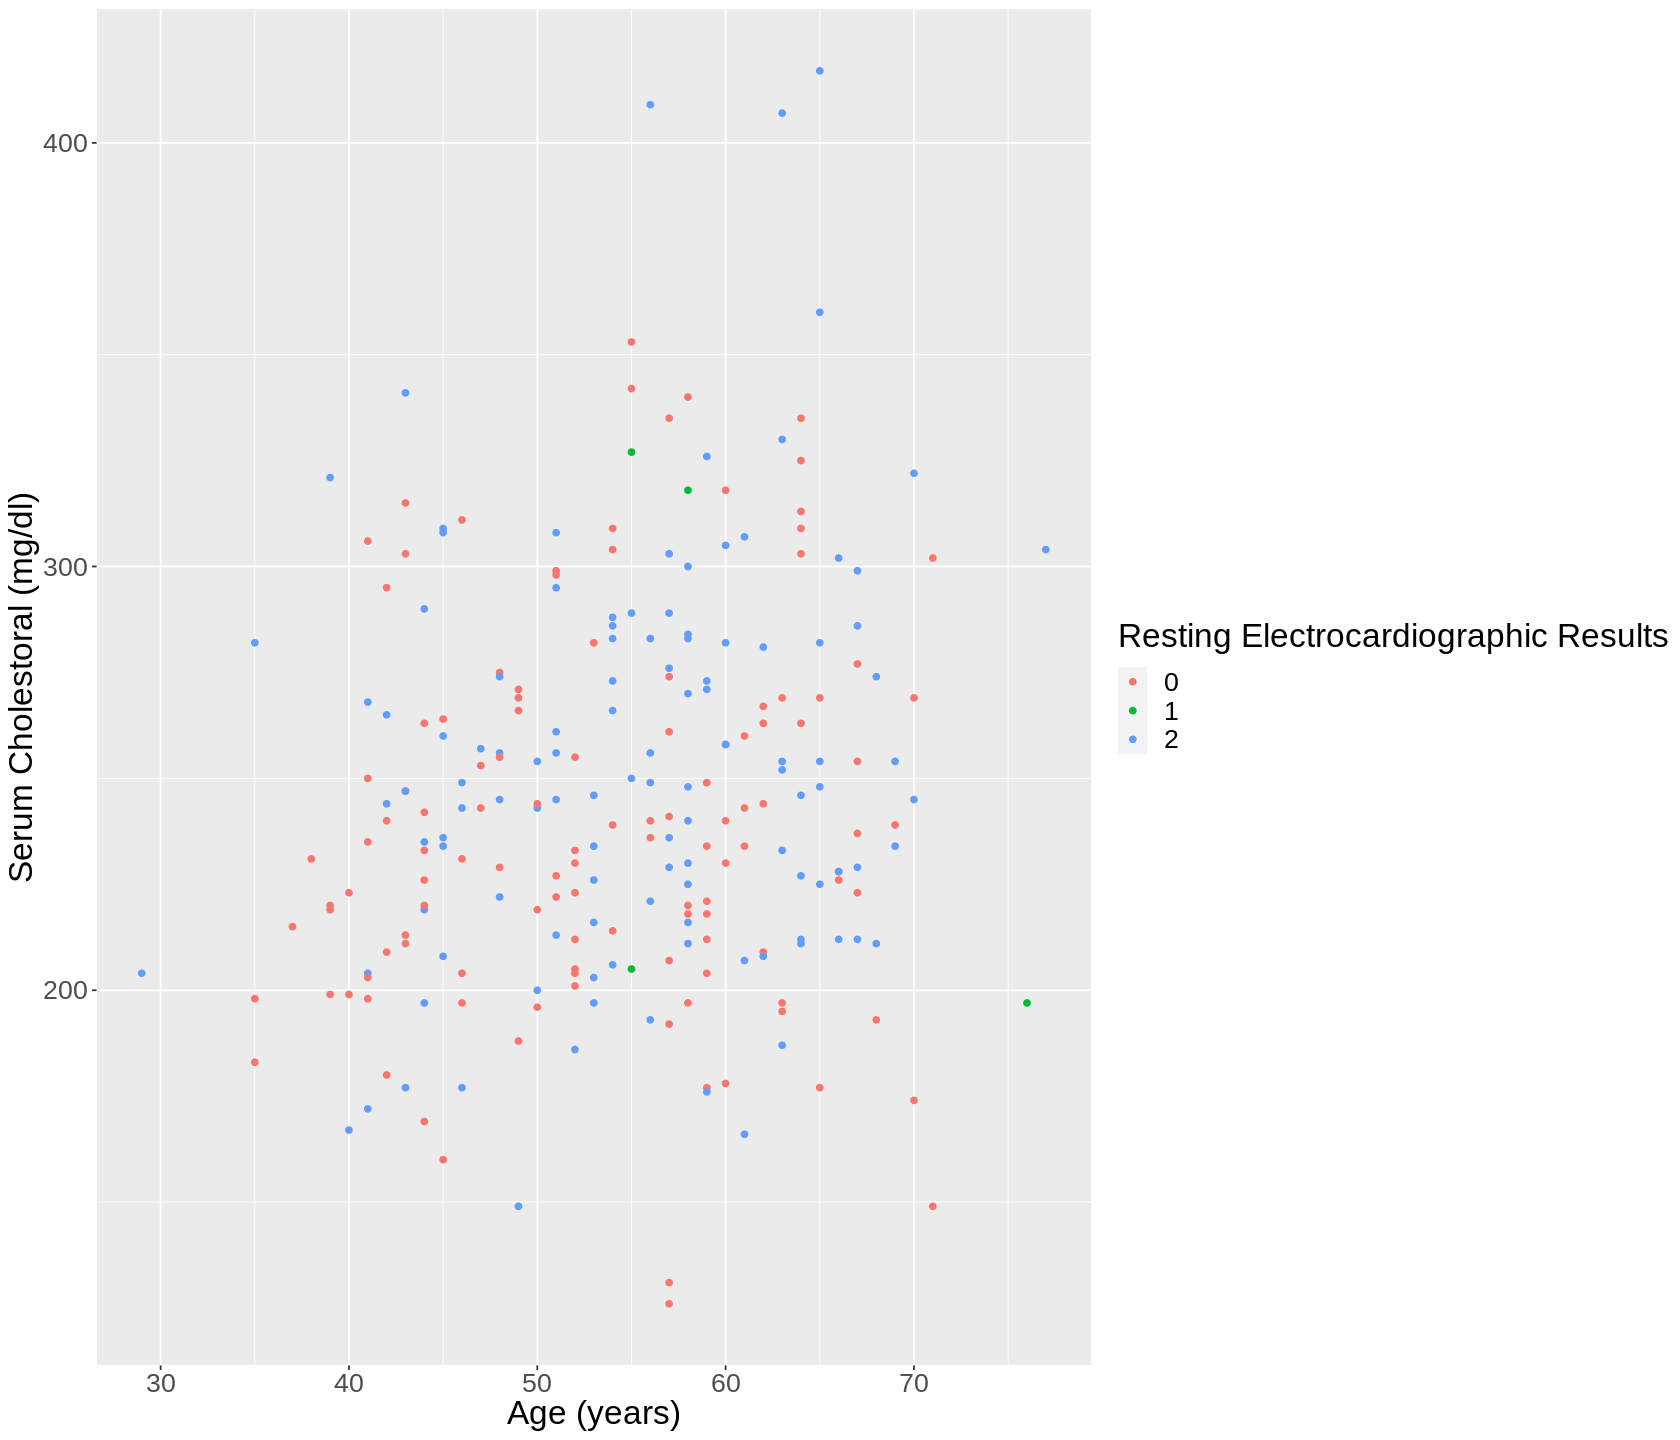

In [12]:
options(repr.plot.width = 14, repr.plot.height = 12)
age_chol_restecg_plot <- ggplot(heart_training, aes(x = age, y = chol, color = restecg)) + 
    geom_point() + 
    labs (x = "Age (years)", y = "Serum Cholestoral (mg/dl)", color = "Resting Electrocardiographic Results")+
theme(text = element_text(size=20))
age_chol_restecg_plot

## Methods

We are going to build a model to predict the **resting electrocardiographic results** and the **diagnosis of heart disease**. 

#### We will mainly use the following variables to make the prediction:

- (#3) **age**

- (#10) **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

- (#12) **chol**: serum cholestoral in mg/dl

- (#32) **thalach**: maximum heart rate achieved

#### The variables we will be predicting are:

- (#19) **restecg**: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- (#58) **num**: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

We will separate the data set into training and testing data, do cross-validation on the training data to build a prediction model for each of the two variables of interest, and then test the accuracy of our model using the testing data.

We will mainly use scatterplots for data visualization, where we plot two quantitative variables against each other and color the data points using the categorical variable we are trying to predict.

## Expected outcomes and significance
We expect to find a positive correlation between: 
- 1. resting blood pressure and risk of heart disease, 
- 2. cholesterol and risk of heart disease, 
- 3. age and risk of heart disease, and
- 4. maximum heart rate achieved and the risk of heart disease.

We expect to see this by observing the differences in the electrocardiographic results as well as the angiographic disease status as compared against age,cholesterol, and resting blood pressure.

These findings are likely to have many great outcomes such as educating people as well as the healthcare system on heart disease and its risk factors. This could eventually encourage further research into heart disease and how to possibly mitigate its effects. These findings would also help the research to be focused on a specific “at-risk” cohort when looking at heart disease. However, it could also have negative outcomes such as causing fear or panic amongst older people who could think that they are at risk of heart disease.

Further questions that these findings could lead to are: Are there preventative measures that one can do to reduce the age-associated risk of heart disease? Is there a quantitative data-analysis method to evaluate this increased risk of heart disease in a more specific way?
